Customer Segmentation
Loyalty program

We have the data on transactions from various shops in two different malls.
With this transaction data , We should give insights to the shops and malls to develop their business. 
    Customer Segmentation is our first task. To segment the customers on various aspects.

In [3]:
import matplotlib.pyplot

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#Reading the Dataset
cus=pd.read_csv('cus.csv')

In [6]:
store=pd.read_excel('store.xlsx')

In [7]:
trans=pd.read_csv('trans.csv')

In [8]:
#Shapes of the data frames
print("Customer ",cus.shape)
print("Store",store.shape)
print("trans",trans.shape)

Customer  (50018, 6)
Store (559, 5)
trans (358088, 6)


In [9]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358088 entries, 0 to 358087
Data columns (total 6 columns):
billing_timestamp    358088 non-null object
transaction_type     358088 non-null object
amount               356180 non-null float64
points               358088 non-null float64
store_code           356179 non-null object
customer_mobile      358088 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.4+ MB


In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 5 columns):
store_name             559 non-null object
store_code             559 non-null object
store_location         559 non-null object
store_category         414 non-null object
store_PriceCategory    559 non-null object
dtypes: object(5)
memory usage: 21.9+ KB


In [11]:
#Checking for identical IDs
trans['store_code'].isin(store['store_code']).value_counts()

True     350611
False      7477
Name: store_code, dtype: int64

In [12]:
cus['customer_id']=cus['customer_id'].astype(str)

In [13]:
trans['customer_mobile']=trans['customer_mobile'].astype(str)

In [14]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358088 entries, 0 to 358087
Data columns (total 6 columns):
billing_timestamp    358088 non-null object
transaction_type     358088 non-null object
amount               356180 non-null float64
points               358088 non-null float64
store_code           356179 non-null object
customer_mobile      358088 non-null object
dtypes: float64(2), object(4)
memory usage: 16.4+ MB


In [15]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50018 entries, 0 to 50017
Data columns (total 6 columns):
customer_id                                                          50018 non-null object
new_customer_name (populate distinct names from any open dataset)    0 non-null float64
created_at                                                           50018 non-null object
gender                                                               24717 non-null object
state                                                                42834 non-null object
tier                                                                 50018 non-null object
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [16]:
cus['gender'].value_counts()

Male      13649
Female    11063
Other         5
Name: gender, dtype: int64

In [17]:
cus['gender'].isnull().sum() 
#There are 25301 null values which contributes to 50% of the total values
#We'd mark the Unknown gender to Unknown

25301

In [18]:
cus['gender']=cus['gender'].fillna('Unknown')

In [19]:
cus['gender'].isnull().sum()

0

In [20]:
cus=cus.drop('new_customer_name (populate distinct names from any open dataset)',axis=1)

In [21]:
(1-cus.isnull().sum()['state']/cus.shape[0])*100 #85% values are filled for state

85.63717061857731

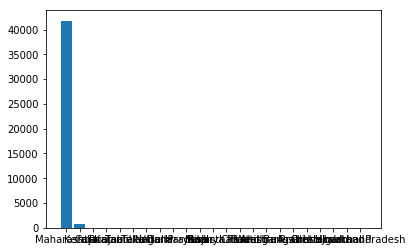

In [22]:

plt.bar(cus['state'].value_counts().index,cus['state'].value_counts().values)

plt.show()

we can see that state column is biased towards maharastra. So filling with maharashtra will be an ideal choice

In [23]:
cus['state']=cus['state'].fillna(cus['state'].mode()[0])

In [24]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50018 entries, 0 to 50017
Data columns (total 5 columns):
customer_id    50018 non-null object
created_at     50018 non-null object
gender         50018 non-null object
state          50018 non-null object
tier           50018 non-null object
dtypes: object(5)
memory usage: 1.9+ MB


Analysis on Customer Master Information

In [25]:
cus.head()

,customer_id,created_at,gender,state,tier
0,256605777046,2019-03-19 15:37:22 +0530,Male,Maharashtra,Blue Member
1,240968898663,2019-03-19 15:37:22 +0530,Male,Maharashtra,Blue Member
2,253538610862,2019-03-19 15:37:22 +0530,Male,Maharashtra,Blue Member
3,243657073811,2019-03-19 15:37:22 +0530,Male,Maharashtra,Blue Member
4,259232168932,2019-03-19 15:37:22 +0530,Male,Maharashtra,Blue Member


In [26]:
trans=trans.rename(columns={'customer_mobile':'customer_id'})

In [27]:
#Checking for identical customer IDs
trans['customer_id'].isin(cus['customer_id']).value_counts()

True    358088
Name: customer_id, dtype: int64

In [28]:
#Compressing the transaction dataset reducing to only purchase of transaction type
trans=trans[trans['transaction_type']=='purchase']

In [29]:
trans.index

Int64Index([   845,    846,    847,    848,    849,    850,    851,    852,
               853,    854,
            ...
            358078, 358079, 358080, 358081, 358082, 358083, 358084, 358085,
            358086, 358087],
           dtype='int64', length=356179)

In [30]:
#Resetting Index
trans=trans.reset_index(drop=True)

In [31]:
trans.shape

(356179, 6)

In [32]:
#No of unique customer IDs
len(trans['customer_id'].unique())

13177

Merging the Customer and Transaction Data

In [33]:
trans_merge = pd.merge(trans,
                     cus,
                     on='customer_id', 
                     how='left')

In [34]:
trans_merge.head()

,billing_timestamp,transaction_type,amount,points,store_code,customer_id,created_at,gender,state,tier
0,2014-10-20 22:38:00 +0530,purchase,3200.0,32.0,IMA00001,256622493374,2019-03-19 15:37:22 +0530,Male,Maharashtra,Blue Member
1,2014-10-20 22:38:00 +0530,purchase,2000.0,20.0,IMM00003,212411292920,2019-03-19 15:37:24 +0530,Male,Kerala,Blue Member
2,2014-10-20 22:38:00 +0530,purchase,1000.0,10.0,NA-IMA0048,256583467853,2019-03-19 15:37:23 +0530,Male,Maharashtra,Blue Member
3,2014-10-20 22:38:00 +0530,purchase,5000.0,50.0,IMA00007,256583467853,2019-03-19 15:37:23 +0530,Male,Maharashtra,Blue Member
4,2014-10-20 22:38:00 +0530,purchase,80000.0,800.0,NA-IMA0014,256583467853,2019-03-19 15:37:23 +0530,Male,Maharashtra,Blue Member


In [35]:
store.head()

,store_name,store_code,store_location,store_category,store_PriceCategory
0,Kansas Denims,IMM00033,Emerald Mall,"Women's Fashion,Men's Fashion",Premium
1,Homosapiens,IMM00020,Emerald Mall,"Women's Fashion,Men's Fashion",Premium
2,Rocket Swims,IMM00153,Emerald Mall,"Sports & Fitness,Women's Fashion,Men's Fashion",Premium
3,Spade & Yard,IMM00027,Emerald Mall,Gifts & Toys,Value
4,Pondicherry,IMM00008,Emerald Mall,"Accessories,Women's Fashion",Premium


In [36]:
trans[trans['store_code'].isin(store['store_code'])==False]['store_code'].shape[0]/trans.shape[0]

0.015632589231818834

In [37]:
store['store_category'].isnull().sum()

145

In [38]:
#store['store_category'].value_counts()

Filling store category manually using store names

In [39]:
#Reading new store dataset
store2=pd.read_excel('store 2.xlsx')

In [40]:
store2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 5 columns):
store_name             559 non-null object
store_code             559 non-null object
store_location         559 non-null object
store_category         463 non-null object
store_PriceCategory    559 non-null object
dtypes: object(5)
memory usage: 21.9+ KB


In [41]:
store2.isnull().sum()

store_name              0
store_code              0
store_location          0
store_category         96
store_PriceCategory     0
dtype: int64

In [42]:
store2['store_code'].unique().shape #There is no duplicates in the store code

(559,)

Now merging store data with transaction data

In [43]:
df = pd.merge(trans_merge,
                     store2,
                     on='store_code', 
                     how='left')

In [44]:
df.shape

(356179, 14)

In [45]:
df.head()

,billing_timestamp,transaction_type,amount,points,store_code,customer_id,created_at,gender,state,tier,store_name,store_location,store_category,store_PriceCategory
0,2014-10-20 22:38:00 +0530,purchase,3200.0,32.0,IMA00001,256622493374,2019-03-19 15:37:22 +0530,Male,Maharashtra,Blue Member,Sprinkles,Diamond Mall,"Accessories,Jewellery,Women's Fashion",Premium
1,2014-10-20 22:38:00 +0530,purchase,2000.0,20.0,IMM00003,212411292920,2019-03-19 15:37:24 +0530,Male,Kerala,Blue Member,Das Shoes,Emerald Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium
2,2014-10-20 22:38:00 +0530,purchase,1000.0,10.0,NA-IMA0048,256583467853,2019-03-19 15:37:23 +0530,Male,Maharashtra,Blue Member,Gameon!,Diamond Mall,"Electronics,Entertainment & Leisure",Premium
3,2014-10-20 22:38:00 +0530,purchase,5000.0,50.0,IMA00007,256583467853,2019-03-19 15:37:23 +0530,Male,Maharashtra,Blue Member,Das Shoes,Diamond Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium
4,2014-10-20 22:38:00 +0530,purchase,80000.0,800.0,NA-IMA0014,256583467853,2019-03-19 15:37:23 +0530,Male,Maharashtra,Blue Member,Cuffs,Diamond Mall,Men's Fashion,Premium


In [46]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356179 entries, 0 to 356178
Data columns (total 14 columns):
billing_timestamp      356179 non-null object
transaction_type       356179 non-null object
amount                 356179 non-null float64
points                 356179 non-null float64
store_code             356179 non-null object
customer_id            356179 non-null object
created_at             356179 non-null object
gender                 356179 non-null object
state                  356179 non-null object
tier                   356179 non-null object
store_name             350611 non-null object
store_location         350611 non-null object
store_category         335456 non-null object
store_PriceCategory    350611 non-null object
dtypes: float64(2), object(12)
memory usage: 40.8+ MB


In [47]:
#Changing Date columns to data object
from datetime import datetime
df['created_at']=pd.to_datetime(df['created_at'])

In [48]:
df['billing_timestamp']=pd.to_datetime(df['billing_timestamp'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356179 entries, 0 to 356178
Data columns (total 14 columns):
billing_timestamp      356179 non-null datetime64[ns, pytz.FixedOffset(330)]
transaction_type       356179 non-null object
amount                 356179 non-null float64
points                 356179 non-null float64
store_code             356179 non-null object
customer_id            356179 non-null object
created_at             356179 non-null datetime64[ns, pytz.FixedOffset(330)]
gender                 356179 non-null object
state                  356179 non-null object
tier                   356179 non-null object
store_name             350611 non-null object
store_location         350611 non-null object
store_category         335456 non-null object
store_PriceCategory    350611 non-null object
dtypes: datetime64[ns, pytz.FixedOffset(330)](2), float64(2), object(10)
memory usage: 40.8+ MB


In [50]:
df[df['store_name'].isnull()==True]['store_code'].value_counts()

S0001    4946
S0002     622
Name: store_code, dtype: int64

In [51]:
df.head()

,billing_timestamp,transaction_type,amount,points,store_code,customer_id,created_at,gender,state,tier,store_name,store_location,store_category,store_PriceCategory
0,2014-10-20 22:38:00+05:30,purchase,3200.0,32.0,IMA00001,256622493374,2019-03-19 15:37:22+05:30,Male,Maharashtra,Blue Member,Sprinkles,Diamond Mall,"Accessories,Jewellery,Women's Fashion",Premium
1,2014-10-20 22:38:00+05:30,purchase,2000.0,20.0,IMM00003,212411292920,2019-03-19 15:37:24+05:30,Male,Kerala,Blue Member,Das Shoes,Emerald Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium
2,2014-10-20 22:38:00+05:30,purchase,1000.0,10.0,NA-IMA0048,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Gameon!,Diamond Mall,"Electronics,Entertainment & Leisure",Premium
3,2014-10-20 22:38:00+05:30,purchase,5000.0,50.0,IMA00007,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Das Shoes,Diamond Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium
4,2014-10-20 22:38:00+05:30,purchase,80000.0,800.0,NA-IMA0014,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Cuffs,Diamond Mall,Men's Fashion,Premium


In [52]:
df=df.fillna('Unknown') #Filling the Unknown store values with 'Unknown' tag

In [53]:
df.isnull().sum()

billing_timestamp      0
transaction_type       0
amount                 0
points                 0
store_code             0
customer_id            0
created_at             0
gender                 0
state                  0
tier                   0
store_name             0
store_location         0
store_category         0
store_PriceCategory    0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356179 entries, 0 to 356178
Data columns (total 14 columns):
billing_timestamp      356179 non-null datetime64[ns, pytz.FixedOffset(330)]
transaction_type       356179 non-null object
amount                 356179 non-null float64
points                 356179 non-null float64
store_code             356179 non-null object
customer_id            356179 non-null object
created_at             356179 non-null datetime64[ns, pytz.FixedOffset(330)]
gender                 356179 non-null object
state                  356179 non-null object
tier                   356179 non-null object
store_name             356179 non-null object
store_location         356179 non-null object
store_category         356179 non-null object
store_PriceCategory    356179 non-null object
dtypes: datetime64[ns, pytz.FixedOffset(330)](2), float64(2), object(10)
memory usage: 40.8+ MB


As we know all the type of transaction is 'purchase',removing transaction type column from the df

In [55]:
#Remove duplicates from the dataframe
df=df.drop_duplicates()

In [56]:
df=df.drop('transaction_type',axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348509 entries, 0 to 356178
Data columns (total 13 columns):
billing_timestamp      348509 non-null datetime64[ns, pytz.FixedOffset(330)]
amount                 348509 non-null float64
points                 348509 non-null float64
store_code             348509 non-null object
customer_id            348509 non-null object
created_at             348509 non-null datetime64[ns, pytz.FixedOffset(330)]
gender                 348509 non-null object
state                  348509 non-null object
tier                   348509 non-null object
store_name             348509 non-null object
store_location         348509 non-null object
store_category         348509 non-null object
store_PriceCategory    348509 non-null object
dtypes: datetime64[ns, pytz.FixedOffset(330)](2), float64(2), object(9)
memory usage: 37.2+ MB


In [58]:
df.head()

,billing_timestamp,amount,points,store_code,customer_id,created_at,gender,state,tier,store_name,store_location,store_category,store_PriceCategory
0,2014-10-20 22:38:00+05:30,3200.0,32.0,IMA00001,256622493374,2019-03-19 15:37:22+05:30,Male,Maharashtra,Blue Member,Sprinkles,Diamond Mall,"Accessories,Jewellery,Women's Fashion",Premium
1,2014-10-20 22:38:00+05:30,2000.0,20.0,IMM00003,212411292920,2019-03-19 15:37:24+05:30,Male,Kerala,Blue Member,Das Shoes,Emerald Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium
2,2014-10-20 22:38:00+05:30,1000.0,10.0,NA-IMA0048,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Gameon!,Diamond Mall,"Electronics,Entertainment & Leisure",Premium
3,2014-10-20 22:38:00+05:30,5000.0,50.0,IMA00007,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Das Shoes,Diamond Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium
4,2014-10-20 22:38:00+05:30,80000.0,800.0,NA-IMA0014,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Cuffs,Diamond Mall,Men's Fashion,Premium


Exploratory Data Analysis
Univariate Analysis

In [59]:
df.describe()
#Mean of the Amount transactioned is 2961.82
#Min is 0 and Max is 1330000 {Thirteen Lakhs Thirty Thousand}
#75% of the values are under 2630


,amount,points
count,3.485090e+05,348509.000000
mean,2.976083e+03,32.307199
std,1.108421e+04,124.150136
min,0.000000e+00,0.000000
25%,2.780000e+02,2.920000
50%,9.650000e+02,9.990000
75%,2.642000e+03,27.990000
max,1.330000e+06,13300.000000


WE Can infer that most of the transactions are low valued.
High valued transactions are mostly rare and are outliers

In [60]:
import seaborn as sns

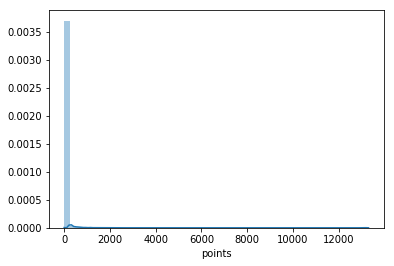

In [61]:
sns.distplot(df['points'],hist=True) #we're not getting the clear histogram,because the distribution is biasex
plt.show()

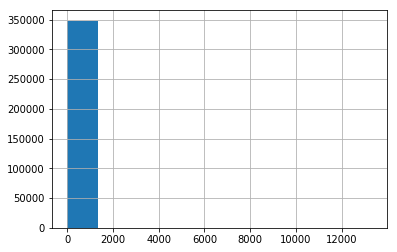

In [62]:
df['points'].hist(bins=10)

In [63]:
df.corr() #There is a high co-relation between Amount and points 

,amount,points
amount,1.000000,0.965405
points,0.965405,1.000000


customers earn 1 point for each 100 bucks of transaction

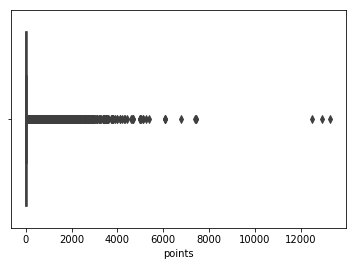

In [64]:
sns.boxplot(df['points'])

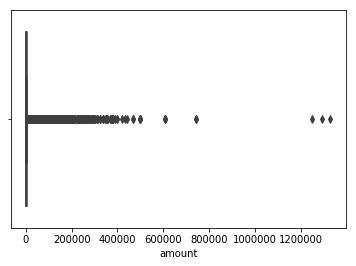

In [65]:
sns.boxplot(df['amount']) #Boxplot shows the distribution is biased towards a lower range

In [66]:
df['customer_id'].value_counts()[df['customer_id'].value_counts()>1000] 
#Top contributor on transactions

240975802340    2541
256947967425    2242
256608695427    1942
259472473372    1829
255283145507    1771
260449806289    1743
196141256469    1501
256949578418    1430
256613023470    1188
255207440548    1115
184089683800    1112
243607556755    1103
256592682127    1073
255285716438    1050
257907631184    1023
Name: customer_id, dtype: int64

In [67]:
#Customer with more transactionso.
df[df['customer_id']=='240975802340'].head()

,billing_timestamp,amount,points,store_code,customer_id,created_at,gender,state,tier,store_name,store_location,store_category,store_PriceCategory
54947,2015-10-09 01:43:00+05:30,1203.0,12.03,IMM00183,240975802340,2019-03-19 15:48:43+05:30,Male,Maharashtra,Gold Member,Streetside Store,Emerald Mall,"Kids Fashion,Accessories,Women's Fashion,Men's...",Premium
54948,2015-10-09 01:43:00+05:30,113.0,1.13,NA-IMM0022,240975802340,2019-03-19 15:48:43+05:30,Male,Maharashtra,Gold Member,Cafe Telaviv,Emerald Mall,Food & Beverage,Premium
56940,2015-10-29 01:44:00+05:30,280.0,2.80,IMM00094,240975802340,2019-03-19 15:48:43+05:30,Male,Maharashtra,Gold Member,Guardwell Pharma,Emerald Mall,Health & Wellness,Value
56941,2015-10-29 01:44:00+05:30,560.0,5.60,NA-IMM0022,240975802340,2019-03-19 15:48:43+05:30,Male,Maharashtra,Gold Member,Cafe Telaviv,Emerald Mall,Food & Beverage,Premium
57509,2015-11-03 15:15:00+05:30,1294.0,12.94,IMM00061,240975802340,2019-03-19 15:48:43+05:30,Male,Maharashtra,Gold Member,Lal Mahal,Emerald Mall,Food & Beverage,Premium


In [68]:
df[df['customer_id']=='240975802340']['amount'].sum()

1731998.22

In [69]:
df[df['customer_id']=='240975802340']['points'].sum()

18463.78

In [70]:
df[df['customer_id']=='240975802340']['store_location'].value_counts()

Emerald Mall    2541
Name: store_location, dtype: int64

In [71]:
df[df['customer_id']=='240975802340']['store_category'].value_counts()

Food & Beverage                                                                                                                              1885
Electronics,Kids Fashion,Accessories,Grocery & Household,Home & Lifestyle,Women's Fashion,Men's Fashion,Books and Stationery,Gifts & Toys     382
Unknown                                                                                                                                        86
Beauty & Grooming                                                                                                                              42
Kids Fashion,Accessories,Women's Fashion,Men's Fashion                                                                                         32
Women's Fashion                                                                                                                                25
Entertainment & Leisure                                                                                                     

In [72]:
df[df['customer_id']=='240975802340']['store_PriceCategory'].value_counts()

Premium          1430
Value            1110
Super Premium       1
Name: store_PriceCategory, dtype: int64

Customer with customer ID "240975802340" has made the highest transaction
He has totally spent an amount of 1744731 during his whole course of transactions in this 60 months and he earned 18592 points.
And He made his every transactions on Emerald Mall
He mostly spent on Food and Beverages and made purchase of Electronics
And This Gold member mostly made his transactions on Premium Stores.



In [73]:
t=df['tier'].value_counts().reset_index()
t['index'].tolist()

['Blue Member', 'Silver Member', 'Gold Member', 'Platinum Member']

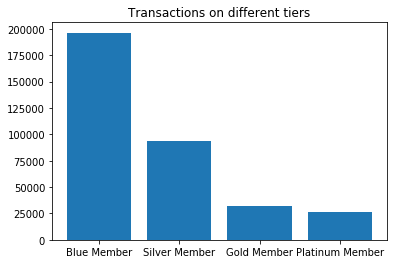

In [74]:
plt.bar(t.index,t.tier)
plt.title('Transactions on different tiers')
plt.xticks([0,1,2,3],t['index'])
plt.show()

Text(0.5, 1.0, 'No. of Transactions vs Malls')

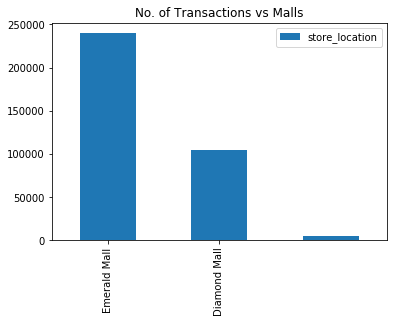

In [75]:
df['store_location'].value_counts().reset_index().plot(kind='bar')
plt.xticks([0,1],df['store_location'].value_counts().reset_index()['index'])
plt.title('No. of Transactions vs Malls')

In [76]:
df['store_category'].value_counts() #Transactions vs Store category

Food & Beverage                                                                                                                              79623
Grocery & Household                                                                                                                          46229
Electronics,Kids Fashion,Accessories,Grocery & Household,Home & Lifestyle,Women's Fashion,Men's Fashion,Books and Stationery,Gifts & Toys    37330
Women's Fashion                                                                                                                              29570
Kids Fashion,Accessories,Women's Fashion,Men's Fashion                                                                                       27541
Women's Fashion,Men's Fashion                                                                                                                26811
Unknown                                                                                                               

Text(0.5, 1.0, 'Number of Transactions vs Store_PriceCategory')

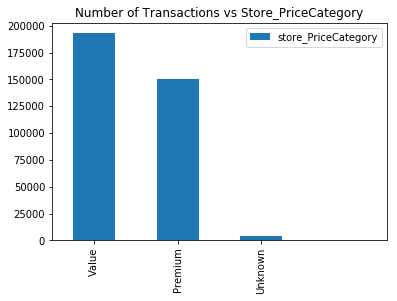

In [77]:
df['store_PriceCategory'].value_counts()
df['store_PriceCategory'].value_counts().reset_index().plot(kind='bar')
plt.xticks([0,1,2],df['store_PriceCategory'].value_counts().reset_index()['index'])
plt.title('Number of Transactions vs Store_PriceCategory')

BiVariate Analysis

In [78]:
#Extracting YearMonth from the billing_timestamp
df['Year_Month']=df['billing_timestamp'].map(lambda x : 100*x.year+x.month)

In [79]:
df['Year_Month'].unique()

array([201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505,
       201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601,
       201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609,
       201610, 201611, 201612, 201701, 201702, 201703, 201704, 201705,
       201706, 201707, 201708, 201709, 201710, 201711, 201712, 201801,
       201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809,
       201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905,
       201906, 206206, 201907, 201908], dtype=int64)

In [80]:
#There is a year 2062 #We need to drop that

In [81]:
df[df['Year_Month']==206206]

,billing_timestamp,amount,points,store_code,customer_id,created_at,gender,state,tier,store_name,store_location,store_category,store_PriceCategory,Year_Month
340092,2062-06-01 00:00:00+05:30,130.0,1.3,IMM00112,229082518626,2019-03-19 16:02:12+05:30,Unknown,Maharashtra,Blue Member,The Malnad Coast,Emerald Mall,Food & Beverage,Value,206206


In [82]:
df=df[df['Year_Month']!=206206]

In [83]:
df.head()

,billing_timestamp,amount,points,store_code,customer_id,created_at,gender,state,tier,store_name,store_location,store_category,store_PriceCategory,Year_Month
0,2014-10-20 22:38:00+05:30,3200.0,32.0,IMA00001,256622493374,2019-03-19 15:37:22+05:30,Male,Maharashtra,Blue Member,Sprinkles,Diamond Mall,"Accessories,Jewellery,Women's Fashion",Premium,201410
1,2014-10-20 22:38:00+05:30,2000.0,20.0,IMM00003,212411292920,2019-03-19 15:37:24+05:30,Male,Kerala,Blue Member,Das Shoes,Emerald Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium,201410
2,2014-10-20 22:38:00+05:30,1000.0,10.0,NA-IMA0048,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Gameon!,Diamond Mall,"Electronics,Entertainment & Leisure",Premium,201410
3,2014-10-20 22:38:00+05:30,5000.0,50.0,IMA00007,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Das Shoes,Diamond Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium,201410
4,2014-10-20 22:38:00+05:30,80000.0,800.0,NA-IMA0014,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Cuffs,Diamond Mall,Men's Fashion,Premium,201410


In [84]:
#Total Amount Transactioned from Oct 2014 to Aug 2019
x=df.groupby(['Year_Month'])['amount'].sum().reset_index()
x.head()

,Year_Month,amount
0,201410,55314202.07
1,201411,6361142.55
2,201412,8213137.07
3,201501,13376994.46
4,201502,5670653.93


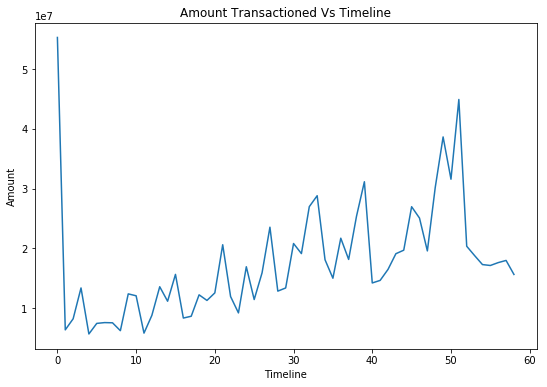

In [85]:
#plotting this
plt.figure(figsize=(9,6))
plt.plot(x.index,x['amount'])
plt.xlabel('Timeline')
plt.ylabel('Amount')
plt.title('Amount Transactioned Vs Timeline')

plt.show()


In [86]:
df['Year']=df['billing_timestamp'].map(lambda x : x.year)

In [87]:
df['Year'].value_counts()

2018    86479
2017    78122
2016    64108
2019    54705
2015    43049
2014    22045
Name: Year, dtype: int64

Text(0.5, 1.0, 'Amount Transactioned in different years')

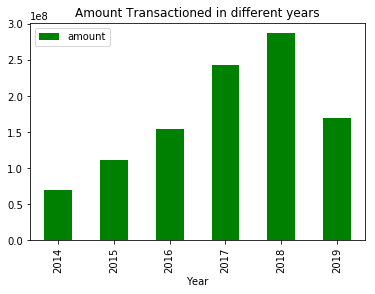

In [88]:
df.groupby(['Year'])['amount'].sum().reset_index().plot('Year','amount',kind='bar',color='g')
plt.title('Amount Transactioned in different years')

In [89]:
c=df.groupby(['Year','store_location'])['amount'].sum().reset_index()
c.head()

,Year,store_location,amount
0,2014,Diamond Mall,17679484.50
1,2014,Emerald Mall,52131308.19
2,2014,Unknown,77689.00
3,2015,Diamond Mall,26178989.38
4,2015,Emerald Mall,84672725.69


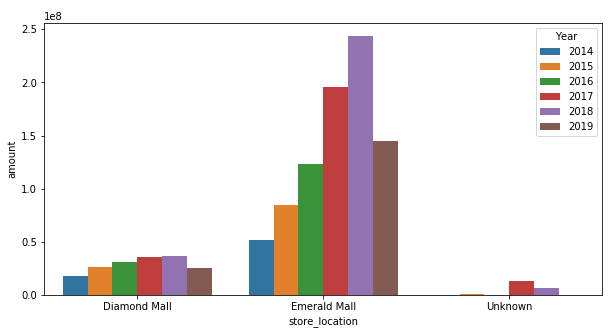

In [90]:
plt.figure(figsize=(10,5))
sns.barplot('store_location',"amount",data=c,hue='Year')

plt.title("StoreLocation Vs Amount Vs Year",color='w')
plt.show()

In [91]:
a=df.groupby(['Year','store_PriceCategory'])['amount'].sum().reset_index()
a.head()

,Year,store_PriceCategory,amount
0,2014,Premium,50863874.70
1,2014,Super Premium,777501.00
2,2014,Unknown,77689.00
3,2014,Value,18169416.99
4,2015,Premium,81179298.67


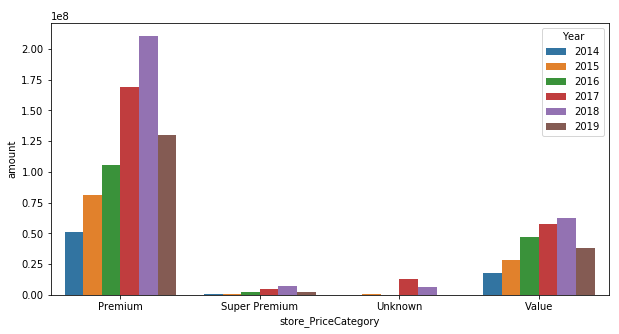

In [92]:
plt.figure(figsize=(10,5))
sns.barplot('store_PriceCategory',"amount",data=a,hue='Year')

plt.title("StoreCategory Vs Amount Vs Year",color='w')
plt.show()

In [93]:
b=df.groupby(['Year','tier'])['amount'].sum().reset_index()
b.head()

,Year,tier,amount
0,2014,Blue Member,52504691.07
1,2014,Gold Member,4029839.21
2,2014,Platinum Member,3310942.09
3,2014,Silver Member,10043009.32
4,2015,Blue Member,75229881.24


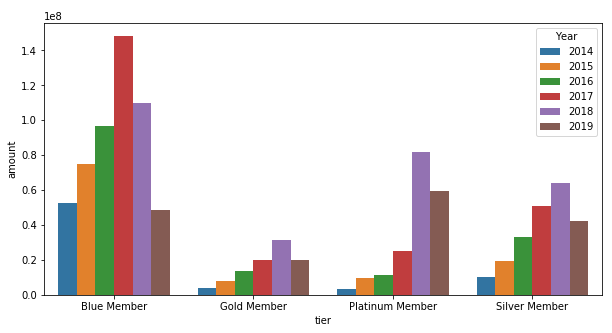

In [94]:
plt.figure(figsize=(10,5))
sns.barplot('tier',"amount",data=b,hue='Year')

plt.title("Customer tier Vs Amount Vs Year",color='w')
plt.show()

In [248]:
cust=df.groupby('customer_id').agg({'amount':sum,'points':sum,'tier':pd.Series.mode}).reset_index()
cust.head()

,customer_id,amount,points,tier
0,162074559143,1.0,0.01,Blue Member
1,162082081317,54419.0,544.19,Blue Member
2,163623918706,1078.8,10.79,Blue Member
3,164381930905,2473.5,24.74,Blue Member
4,182929244726,7995.0,79.95,Blue Member


In [96]:
customer=pd.merge(cust,cus,on='customer_id',how='left')

In [97]:
customer.head()

,customer_id,amount,points,created_at,gender,state,tier
0,162074559143,1.0,0.01,2019-07-01 16:40:56 +0530,Unknown,Maharashtra,Blue Member
1,162082081317,54419.0,544.19,2019-03-19 16:01:36 +0530,Male,Maharashtra,Blue Member
2,163623918706,1078.8,10.79,2019-06-22 21:26:46 +0530,Unknown,Maharashtra,Blue Member
3,164381930905,2473.5,24.74,2019-06-09 14:42:05 +0530,Unknown,Maharashtra,Blue Member
4,182929244726,7995.0,79.95,2019-05-24 18:36:47 +0530,Unknown,Maharashtra,Blue Member


In [98]:
n=customer.sort_values(by='amount',ascending=False).head(10)
n #Top 10 customers who have spent more

,customer_id,amount,points,created_at,gender,state,tier
3802,249853390927,38313774.36,428942.76,2019-03-19 15:41:48 +0530,Male,Maharashtra,Platinum Member
2136,234549952039,11152508.10,116627.56,2019-03-19 15:48:15 +0530,Male,Maharashtra,Platinum Member
5144,255285716438,5607268.35,58584.73,2019-03-19 15:41:29 +0530,Female,Maharashtra,Platinum Member
1317,218685897215,5518171.00,65979.99,2019-03-19 15:51:43 +0530,Female,Maharashtra,Blue Member
8332,256626721286,4635650.25,48489.55,2019-03-19 15:42:50 +0530,Male,Maharashtra,Platinum Member
548,201487636674,4416697.21,64146.93,2019-03-19 16:05:01 +0530,Male,Maharashtra,Platinum Member
800,206429912326,4171951.00,50957.64,2019-03-19 15:52:29 +0530,Female,Maharashtra,Blue Member
10449,257909087121,3717029.00,42984.33,2019-03-19 15:52:03 +0530,Female,Maharashtra,Blue Member
3989,251349876513,3713864.00,39816.48,2019-03-19 15:49:43 +0530,Unknown,Maharashtra,Platinum Member
12624,260454328530,3453047.97,35105.72,2019-03-19 15:45:02 +0530,Female,Maharashtra,Gold Member


In [99]:
df[df['customer_id']=='249853390927']['store_location'].value_counts()

Emerald Mall    487
Diamond Mall      3
Name: store_location, dtype: int64

In [100]:
df[df['customer_id']=='249853390927']['store_PriceCategory'].value_counts()

Premium    464
Value       26
Name: store_PriceCategory, dtype: int64

In [101]:
df[df['customer_id'].isin(n['customer_id'])].shape #To filter the top 10 customer transactions

(4105, 15)

In [102]:
(df[df['customer_id'].isin(n['customer_id'])]['amount'].sum()/df['amount'].sum()) *100
#Percentage of contribution

8.166279942465557

In [103]:
df[df['customer_id'].isin(n['customer_id'])]['store_PriceCategory'].value_counts()

Premium          3194
Value             886
Super Premium      23
Unknown             2
Name: store_PriceCategory, dtype: int64

In [104]:
df[df['customer_id'].isin(n['customer_id'])]['store_category'].value_counts()

Electronics                                                                                                                                  878
Women's Fashion                                                                                                                              819
Women's Fashion,Men's Fashion                                                                                                                338
Beauty & Grooming                                                                                                                            338
Accessories,Women's Fashion,Men's Fashion                                                                                                    334
Food & Beverage                                                                                                                              283
Electronics,Kids Fashion,Accessories,Grocery & Household,Home & Lifestyle,Women's Fashion,Men's Fashion,Books and Stationery,Gifts

*Customer with customer id "249853390927" is the top customer who made the transactions with total amount of 38559062 (Three Crores and eighty five lakhs fifty nine thousand sixty two)
*This platinum member has made most of his transactions on Emerald Mall with premium stores
*Top 10 customers made 4298 transactions in total
*Top 10 customers contribute to 8.5% of total amount transactioned
*Out of this 10 customers 4 are male and 5 are female
*7 platinum members out of 10
*Has made most of their transactions on premium store
*Electronics contribute much on their amount transactioned
*As there are five females ,Women's Fashion also contributed much in their amount transactioned.

In [105]:
df.head()

,billing_timestamp,amount,points,store_code,customer_id,created_at,gender,state,tier,store_name,store_location,store_category,store_PriceCategory,Year_Month,Year
0,2014-10-20 22:38:00+05:30,3200.0,32.0,IMA00001,256622493374,2019-03-19 15:37:22+05:30,Male,Maharashtra,Blue Member,Sprinkles,Diamond Mall,"Accessories,Jewellery,Women's Fashion",Premium,201410,2014
1,2014-10-20 22:38:00+05:30,2000.0,20.0,IMM00003,212411292920,2019-03-19 15:37:24+05:30,Male,Kerala,Blue Member,Das Shoes,Emerald Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium,201410,2014
2,2014-10-20 22:38:00+05:30,1000.0,10.0,NA-IMA0048,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Gameon!,Diamond Mall,"Electronics,Entertainment & Leisure",Premium,201410,2014
3,2014-10-20 22:38:00+05:30,5000.0,50.0,IMA00007,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Das Shoes,Diamond Mall,"Accessories,Sports & Fitness,Women's Fashion,M...",Premium,201410,2014
4,2014-10-20 22:38:00+05:30,80000.0,800.0,NA-IMA0014,256583467853,2019-03-19 15:37:23+05:30,Male,Maharashtra,Blue Member,Cuffs,Diamond Mall,Men's Fashion,Premium,201410,2014


In [106]:
df.shape

(348508, 15)

RFM Analysis
RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary).

In [107]:
print("Date is spread between",df['billing_timestamp'].min(),"and",df['billing_timestamp'].max())

Date is spread between 2014-10-20 22:38:00+05:30 and 2019-08-29 15:43:00+05:30


In [108]:
#Let's assume that the study is being done as of 01/Sep/2019.
#Number of days from the study date is calculated.
import datetime as dt
sd=dt.datetime(2019,9,1)



In [109]:
#Removing the time zone from the timestamp
df['billing_timestamp']=df['billing_timestamp'].dt.tz_localize(None)

In [110]:
rfm=df.groupby('customer_id').agg({'billing_timestamp': lambda x : (sd-x.max()).days,'customer_id':'count','amount':'sum'})

In [111]:
rfm.columns=['Recency','Frequency','Monetary']

In [118]:
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
162074559143,62,1,1.0
162082081317,432,1,54419.0
163623918706,70,1,1078.8
164381930905,84,1,2473.5
182929244726,99,1,7995.0


In [113]:
rfm.describe()

,Recency,Frequency,Monetary
count,13177.000000,13177.000000,1.317700e+04
mean,614.852091,26.448205,7.871226e+04
std,564.720367,89.194342,4.234391e+05
min,2.000000,1.000000,1.000000e+00
25%,136.000000,1.000000,5.000000e+03
50%,376.000000,2.000000,8.897000e+03
75%,848.000000,12.000000,3.732000e+04
max,1776.000000,2541.000000,3.831377e+07


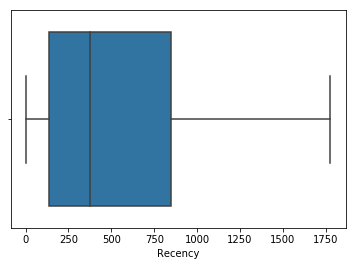

In [122]:
sns.boxplot(rfm['Recency'])

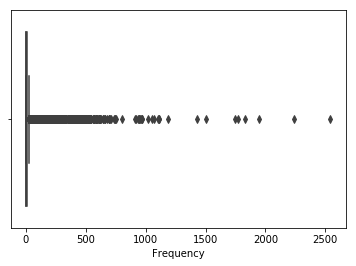

In [123]:
sns.boxplot(rfm['Frequency'])

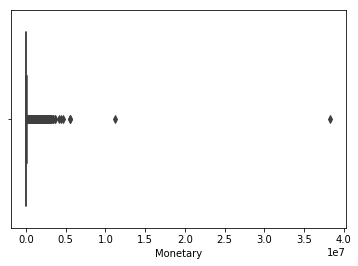

In [126]:
sns.boxplot(rfm['Monetary'])

In [148]:
#Creating labels for R,F and M
#Creating Labels for Recency and Frequency
r_labels=range(4,0,-1)
f_labels=range(1,5)
#Assign these labels to four equal percentile groups
r_groups=pd.qcut(rfm['Recency'],4,labels=r_labels)


In [149]:
rfm['Frequency'].describe()

count    13177.000000
mean        26.448205
std         89.194342
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       2541.000000
Name: Frequency, dtype: float64

In [168]:
#Assigning groups to frequency
f_groups=pd.cut(rfm['Frequency'],bins=[0,2,12,100,2542],labels=f_labels)

In [169]:
rfm=rfm.assign(R=r_groups.values,F=f_groups.values)

In [170]:
rfm.head()

,Recency,Frequency,Monetary,R,F
customer_id,,,,,
162074559143,62,1,1.0,4,1
162082081317,432,1,54419.0,2,1
163623918706,70,1,1078.8,4,1
164381930905,84,1,2473.5,4,1
182929244726,99,1,7995.0,4,1


In [173]:
#Assigning groups to Monetary Vaues
m_labels=range(1,5)
m_groups=pd.qcut(rfm['Monetary'],4,labels=m_labels)

In [174]:
rfm=rfm.assign(M=m_groups.values)

In [175]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
162074559143,62,1,1.0,4,1,1
162082081317,432,1,54419.0,2,1,4
163623918706,70,1,1078.8,4,1,1
164381930905,84,1,2473.5,4,1,1
182929244726,99,1,7995.0,4,1,2


In [176]:
#Concatenate R,F,M values to create RFM Segments
def join(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM']=rfm.apply(join,axis=1)

In [177]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM
customer_id,,,,,,,
162074559143,62,1,1.0,4,1,1,411
162082081317,432,1,54419.0,2,1,4,214
163623918706,70,1,1078.8,4,1,1,411
164381930905,84,1,2473.5,4,1,1,411
182929244726,99,1,7995.0,4,1,2,412


In [181]:
rfm['RFM'].nunique()

52

Having 52 different segments using the concatenate method quickly becomes unwieldy for any practical use. We will need a more concise way to define our segments.

One of the most straightforward methods is to sum our scores to a single number and define RFM levels for each score range.

In [182]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [183]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
customer_id,,,,,,,,
162074559143,62,1,1.0,4,1,1,411,6.0
162082081317,432,1,54419.0,2,1,4,214,7.0
163623918706,70,1,1078.8,4,1,1,411,6.0
164381930905,84,1,2473.5,4,1,1,411,6.0
182929244726,99,1,7995.0,4,1,2,412,7.0


We can get creative and hypothesize about what each score range entails

In [194]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 8:
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,RFM_Level
customer_id,,,,,,,,,
162074559143,62,1,1.0,4,1,1,411,6.0,Potential
162082081317,432,1,54419.0,2,1,4,214,7.0,Loyal
163623918706,70,1,1078.8,4,1,1,411,6.0,Potential
164381930905,84,1,2473.5,4,1,1,411,6.0,Potential
182929244726,99,1,7995.0,4,1,2,412,7.0,Loyal


In [195]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm.groupby('RFM_Level').agg({
    'Recency': ['mean'],
    'Frequency': ['mean'],
    'Monetary': ['mean', 'count']
})

Recency  Frequency       Monetary      
                           mean       mean           mean count
RFM_Level                                                      
Champions            254.654759  76.561692  224177.641450  4255
Loyal                563.821599   5.522215   22447.029310  1463
Needs Attention      948.326716   1.330438    4987.101456  2418
Potential            607.135738   2.751952    9516.505348  2689
Promising            803.507614   1.851664    6365.161732  1773
Require Activation  1456.335060   1.310881    2662.354888   579

#In this method of RFM,there is no proper distinction between the customers.
We can see that there is huge difference between Champions and Loyal customer.
Even promising customers and require activation does not show differentiation.

In [197]:
rfm['RFM'].value_counts()

211    1781
411    1066
311     902
123     766
434     674
444     654
111     579
334     558
112     468
223     454
312     445
323     425
113     415
234     299
122     284
313     274
134     261
423     195
412     195
121     169
413     157
344     155
124     153
322     153
222     133
433     132
213     132
324     126
333     123
133     116
212     113
233     104
224     102
321      86
424      68
244      68
422      65
421      65
221      56
114      54
314      46
214      46
414      15
144      15
232       7
432       6
132       5
431       4
131       3
231       2
332       2
343       1
Name: RFM, dtype: int64

In [200]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,RFM_Level
customer_id,,,,,,,,,
162074559143,62,1,1.0,4,1,1,411,6.0,Potential
162082081317,432,1,54419.0,2,1,4,214,7.0,Loyal
163623918706,70,1,1078.8,4,1,1,411,6.0,Potential
164381930905,84,1,2473.5,4,1,1,411,6.0,Potential
182929244726,99,1,7995.0,4,1,2,412,7.0,Loyal


Trying to use clustering in the RFM values.

In [202]:
rfm_c=rfm[['Recency','Frequency','Monetary']]

In [204]:
rfm_c.head()

,Recency,Frequency,Monetary
customer_id,,,
162074559143,62,1,1.0
162082081317,432,1,54419.0
163623918706,70,1,1078.8
164381930905,84,1,2473.5
182929244726,99,1,7995.0


In [209]:
#Scaling the data to apply k-means clustering
#applying log to the skewed data.
def neg_to_zero(x): #Neglecting zeros to take log
    if x<=0:
        return 1
    else:
        return x
rfm['Recency'] = [neg_to_zero(x) for x in rfm.Recency]
rfm['Monetary'] = [neg_to_zero(x) for x in rfm.Monetary]

In [210]:
rfm_log=rfm_c.apply(np.log , axis=1).round(3)

In [215]:
#To scale the data
from sklearn import preprocessing

In [218]:
scaler=preprocessing.StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_log)

In [220]:
# transform into a dataframe
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)

In [222]:
rfm_scaled.head()

,Recency,Frequency,Monetary
customer_id,,,
162074559143,-1.152703,-0.865279,-5.480765
162082081317,0.218754,-0.865279,0.815757
163623918706,-1.067207,-0.865279,-1.447850
164381930905,-0.937905,-0.865279,-0.969143
182929244726,-0.822027,-0.865279,-0.291216


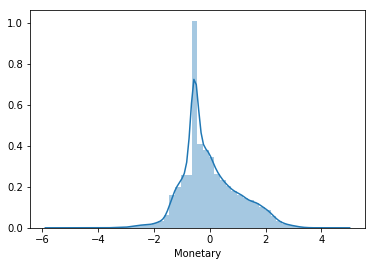

In [223]:
sns.distplot(rfm_scaled['Monetary'])

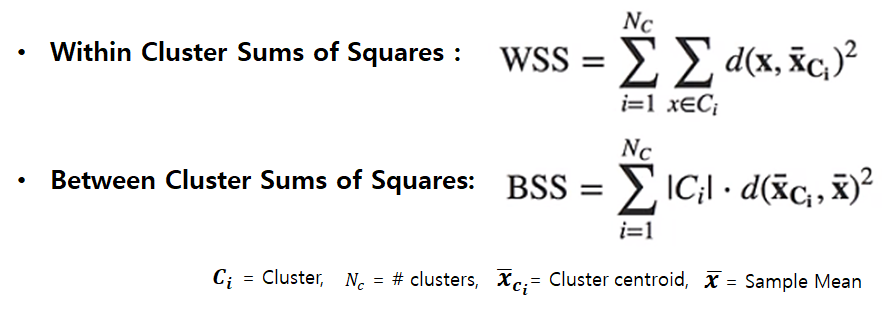

In [224]:
#Clustering

from IPython.display import Image
Image(filename='cluster.png') 

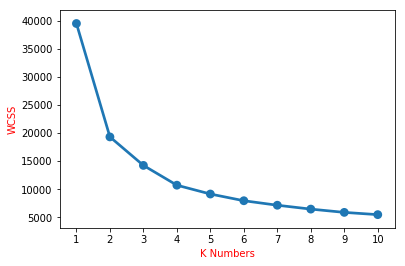

In [229]:
#The elbow method to choose the number of clusters
from sklearn.cluster import KMeans
wss={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++', max_iter=300)
    kmeans.fit(rfm_scaled)
    wss[k]=kmeans.inertia_
#plot the wss values
sns.pointplot(x = list(wss.keys()), y = list(wss.values()))
plt.xlabel('K Numbers',color='r')
plt.ylabel('WCSS',color='r')
plt.show()

In [230]:
#Choosing the optimum number of cluster to be 4
# clustering
clus = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)# Assign the clusters to datamart
rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,RFM_Level,K_Cluster
customer_id,,,,,,,,,,
162074559143,62,1,1.0,4,1,1,411,6.0,Potential,2
162082081317,432,1,54419.0,2,1,4,214,7.0,Loyal,0
163623918706,70,1,1078.8,4,1,1,411,6.0,Potential,2
164381930905,84,1,2473.5,4,1,1,411,6.0,Potential,2
182929244726,99,1,7995.0,4,1,2,412,7.0,Loyal,2


In [238]:
rfm=rfm.reset_index()

In [240]:
rfm['customer_id'].isin(df['customer_id']).value_counts()

True    13177
Name: customer_id, dtype: int64

In [250]:
pd.merge(cust,rfm,on='customer_id') #Merging the Customer and RFM dataset

,customer_id,amount,points,tier,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,RFM_Level,K_Cluster
0,162074559143,1.00,0.01,Blue Member,62,1,1.00,4,1,1,411,6.0,Potential,2
1,162082081317,54419.00,544.19,Blue Member,432,1,54419.00,2,1,4,214,7.0,Loyal,0
2,163623918706,1078.80,10.79,Blue Member,70,1,1078.80,4,1,1,411,6.0,Potential,2
3,164381930905,2473.50,24.74,Blue Member,84,1,2473.50,4,1,1,411,6.0,Potential,2
4,182929244726,7995.00,79.95,Blue Member,99,1,7995.00,4,1,2,412,7.0,Loyal,2
5,182973872100,10162.00,101.62,Blue Member,592,6,10162.00,2,2,3,223,7.0,Loyal,0
6,182975639455,2000.00,20.00,Blue Member,98,1,2000.00,4,1,1,411,6.0,Potential,2
7,182984622165,1499.00,14.99,Blue Member,101,1,1499.00,4,1,1,411,6.0,Potential,2
8,183017849518,57610.00,576.10,Blue Member,566,6,57610.00,2,2,4,224,8.0,Champions,3
9,183031349112,2690.00,26.90,Blue Member,87,1,2690.00,4,1,1,411,6.0,Potential,2


Let's do RFM for the recent years (2 years data) (2018-2019) (20 months data)

In [275]:
df1=df[df['Year']>2017]

In [276]:
rfm=df1.groupby('customer_id').agg({'billing_timestamp': lambda x : (sd-x.max()).days,'customer_id':'count','amount':'sum'})

In [277]:
rfm.columns=['Recency','Frequency','Monetary']

In [279]:
rfm.shape

(7628, 3)

In [280]:
#Creating labels for R,F and M
#Creating Labels for Recency and Frequency
r_labels=range(4,0,-1)
f_labels=range(1,5)
#Assign these labels to four equal percentile groups
r_groups=pd.qcut(rfm['Recency'],4,labels=r_labels)

In [281]:
#Assigning groups to frequency
f_groups=pd.cut(rfm['Frequency'],bins=[0,2,12,100,2542],labels=f_labels)

In [282]:
rfm=rfm.assign(R=r_groups.values,F=f_groups.values)

In [283]:
rfm.head()

,Recency,Frequency,Monetary,R,F
customer_id,,,,,
162074559143,62,1,1.0,4,1
162082081317,432,1,54419.0,1,1
163623918706,70,1,1078.8,4,1
164381930905,84,1,2473.5,3,1
182929244726,99,1,7995.0,3,1


In [284]:
m_labels=range(1,5)
m_groups=pd.qcut(rfm['Monetary'],4,labels=m_labels)
rfm=rfm.assign(M=m_groups.values)
rfm.head()

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
162074559143,62,1,1.0,4,1,1
162082081317,432,1,54419.0,1,1,4
163623918706,70,1,1078.8,4,1,1
164381930905,84,1,2473.5,3,1,1
182929244726,99,1,7995.0,3,1,2


In [285]:
def join(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM']=rfm.apply(join,axis=1)

In [287]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [288]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
customer_id,,,,,,,,
162074559143,62,1,1.0,4,1,1,411,6.0
162082081317,432,1,54419.0,1,1,4,114,6.0
163623918706,70,1,1078.8,4,1,1,411,6.0
164381930905,84,1,2473.5,3,1,1,311,5.0
182929244726,99,1,7995.0,3,1,2,312,6.0


In [289]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 8:
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,RFM_Level
customer_id,,,,,,,,,
162074559143,62,1,1.0,4,1,1,411,6.0,Potential
162082081317,432,1,54419.0,1,1,4,114,6.0,Potential
163623918706,70,1,1078.8,4,1,1,411,6.0,Potential
164381930905,84,1,2473.5,3,1,1,311,5.0,Promising
182929244726,99,1,7995.0,3,1,2,312,6.0,Potential


In [291]:
rfm.groupby('RFM_Level').agg({
    'Recency': ['mean'],
    'Frequency': ['mean'],
    'Monetary': ['mean', 'count']
})

Recency  Frequency       Monetary      
                          mean       mean           mean count
RFM_Level                                                     
Champions            93.799467  48.761416  155256.999075  2628
Loyal               207.043597   6.006812   26098.532793   734
Needs Attention     335.034483   1.329689    3660.710118  1189
Potential           238.040683   3.139138   13315.755460  1229
Promising           240.983646   1.774682    5407.477002  1651
Require Activation  447.756345   1.324873    1545.507310   197

In [292]:
rfm_c=rfm[['Recency','Frequency','Monetary']]

In [293]:
#Scaling the data to apply k-means clustering
#applying log to the skewed data.
def neg_to_zero(x): #Neglecting zeros to take log
    if x<=0:
        return 1
    else:
        return x
rfm['Recency'] = [neg_to_zero(x) for x in rfm.Recency]
rfm['Monetary'] = [neg_to_zero(x) for x in rfm.Monetary]

In [294]:
rfm_log=rfm_c.apply(np.log , axis=1).round(3)
scaler=preprocessing.StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)

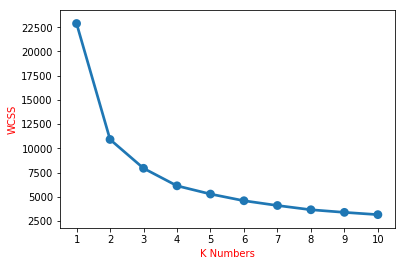

In [295]:
#The elbow method to choose the number of clusters
from sklearn.cluster import KMeans
wss={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++', max_iter=300)
    kmeans.fit(rfm_scaled)
    wss[k]=kmeans.inertia_
#plot the wss values
sns.pointplot(x = list(wss.keys()), y = list(wss.values()))
plt.xlabel('K Numbers',color='r')
plt.ylabel('WCSS',color='r')
plt.show()

In [324]:
#Choosing the optimum number of cluster to be 4
# clustering
clus = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)# Assign the clusters to datamart
rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,RFM_Level,K_Cluster
customer_id,,,,,,,,,,
162074559143,62,1,1.0,4,1,1,411,6.0,Potential,0
162082081317,432,1,54419.0,1,1,4,114,6.0,Potential,1
163623918706,70,1,1078.8,4,1,1,411,6.0,Potential,0
164381930905,84,1,2473.5,3,1,1,311,5.0,Promising,0
182929244726,99,1,7995.0,3,1,2,312,6.0,Potential,0


In [325]:
final=pd.merge(cust,rfm,on='customer_id')

In [326]:
final.head(3)

,customer_id,amount,points,tier,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,RFM_Level,K_Cluster
0,162074559143,1.0,0.01,Blue Member,62,1,1.0,4,1,1,411,6.0,Potential,0
1,162082081317,54419.0,544.19,Blue Member,432,1,54419.0,1,1,4,114,6.0,Potential,1
2,163623918706,1078.8,10.79,Blue Member,70,1,1078.8,4,1,1,411,6.0,Potential,0


In [309]:
final.to_excel('segment.xlsx')

In [327]:
final[final['K_Cluster']==0]['RFM_Level'].value_counts()

Promising             1529
Needs Attention       1189
Potential              761
Loyal                  284
Require Activation     197
Champions              115
Name: RFM_Level, dtype: int64

In [328]:
final[final['K_Cluster']==1]['RFM_Level'].value_counts()

Champions    1086
Potential     468
Loyal         444
Promising     122
Name: RFM_Level, dtype: int64

In [329]:
final[final['K_Cluster']==2]['RFM_Level'].value_counts()

Champions    1427
Loyal           6
Name: RFM_Level, dtype: int64

Series([], Name: RFM_Level, dtype: int64)

In [321]:
final[final['K_Cluster']==3]['RFM'].value_counts()

434    720
444    276
433    137
423     59
424     33
334     21
344     14
422      6
432      5
414      2
443      2
431      1
Name: RFM, dtype: int64

In [323]:
final[final['K_Cluster']==0]['RFM'].value_counts()

211    640
112    473
212    407
122    268
113    216
111    197
123    182
213    130
222    114
121     71
223     66
322     43
221     37
313     18
312     17
114     17
323     15
311     11
321      6
214      6
132      1
Name: RFM, dtype: int64